---
### Example: silica geothermometry in a serpentinizing system

<div>
<img src="images/oman.jpg" width="500" align="center"/>     <img src="images/pigs.jpg" width="500" align="center"/>
</div>

You are a researcher visiting the Oman Ophiolate and are curious about how alkaline the spring water is. You suspect a geologic process called serpentinization is causing this and want to find out how hot it gets below the surface where serpentinization of rocks is taking place. You take two samples from high pH (pH > 11) fluids seeping out from peridotite outcrops. You name these samples "Gas Crack" and "Snail". Back at the lab, you use mass spectrometry to find total silicon (Si) dissolved in each sample:

| Sample     | Total Si ($\mu$molal)  |
| ---------- |-----------------------:|
| Gas Crack  |  1.38                  |
| Snail      | 10.5                   |

With geothermometry, you can use dissolved silica, $\rm{SiO_{2(aq)}}$, to infer the subsurface temperature where these fluids came from. When water reacts with peridotite in the Oman Ophiolite, serpentinization occurs and the silica activity of the fluid can be buffered by both chrysotile (a mineral in the serpentine group) and brucite:

\begin{align}
\mathop{\rm{Mg_{3}Si_{2}O_{5}(OH)_{4}}}\limits_{(chrysotile)} + \rm{H_{2}O} & \rightleftharpoons \mathop{\rm{3Mg(OH)_{2}}}\limits_{(brucite)} + 2\rm{SiO_{2(aq)}} \\
\end{align}

The logarithm of the equilibrium constant (logK) of this reaction can be written as a function of the chemical activities (denoted by the symbol $a$) of the reactants and products:

\begin{align}
\log K & = 2\log a\rm{SiO_{2(aq)}} + 3 \log a\mathop{\rm{Mg(OH)_{2}}}\limits_{(brucite)}\\
& - \log a\mathop{\rm{Mg_{3}Si_{2}O_{5}(OH)_{4}}}\limits_{(chrysotile)} - \log a\rm{H_{2}O}\\
\end{align}

The chemical activities of minerals and pure liquid water are all approximately equal to 1 under these conditions. If we substitute 1 for chemical activities in the previous equation we get:

\begin{align}
\log K & = 2\log a\rm{SiO_{2(aq)}} + 3 \log 1 - \log 1 - \log 1 \\
\log K & = 2\log a\rm{SiO_{2(aq)}} + 0 - 0 - 0 \\
\log K & = 2\log a\rm{SiO_{2(aq)}}
\end{align}

From this, you can approximate the equilibrium constant from the chemical activity of dissolved silica!

However, as the pH is highly alkaline in these samples, and silica can change forms depending on pH conditions. Note how $\rm{HSiO_{3}^{-}}$ becomes a dominant form at high pH in the activity diagram below:

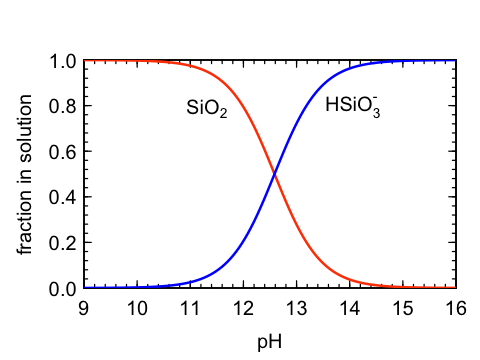

In [57]:
options(repr.plot.width=4, repr.plot.height=3)
suppressMessages({
    library(CHNOSZ)
    data(thermo)
    basis(c("SiO2", "H2O", "H2", "H+"), c(-3, -3, 0))
    species(c("SiO2", "HSiO3-"))
    a <- affinity(pH=c(9, 16), T=25)
    e <- equilibrate(a)
    diagram(e,
            adj=c(0.5, 0.3),
            dy=c(-0.2, -0.2),
            alpha=TRUE,
            ylim=c(0, 1),
            ylab="fraction in solution",
            col=c("orangered", "blue"),
            lty=c(1, 1, 1),
            lwd=c(2, 2, 2)
           )
})

Calculating the likely forms of measured solutes is called **speciation**. Thermodynamics can be used to calculate the **speciated** forms of solutes, including complexation of ions, degree of acid/base association and dissociation, and even oxidation-reduction states (*e.g.*, Fe$^{2+}$ vs Fe$^{3+}$). This is done by performing iterative calculations that attempt to approach chemical equilibrium among solutes within the entire system (*e.g.*, an entire water sample). These kinds of calculations are complicated to perform by hand, so computer programs are typically used instead.

### An interactive speciation demo would go here.

After speciating these Oman Ophiolite samples in EQ3, we can see that the $\log a\rm{SiO_{2(aq)}}$ is -8.33 for "Gas Crack" and -7.23 for "Snail". Now try using silica geothermometry to infer last temperature of equilibration with chrysotile and brucite assuming a subsurface pressure of 200 bars.

Calculate how the logK of the reaction changes as a function of temperature at 200 bars pressure, then find the temperature corresponding to the logK predicted from activities of $\rm{SiO_{2(aq)}}$ measured in "Gas Crack" and "Snail". This is the predicted "temperature of last equilibration" between chrysotile and brucite.

[1] "logK: -16.66, Temperatures: 40.948, for pressure: 200 bars"
[1] "logK: -14.46, Temperatures: 89.156, for pressure: 200 bars"


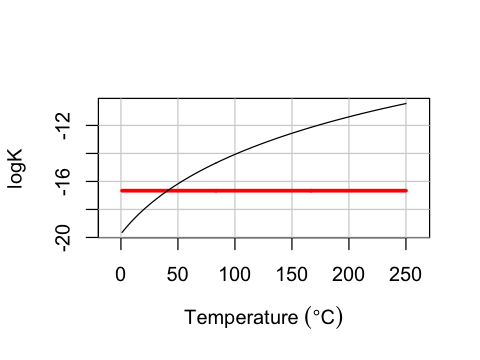

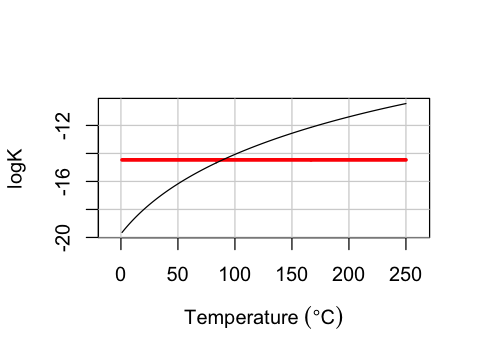

In [61]:
logKs <- 2*c(-8.33, -7.23)   # in this rxn, logaSiO2 is multiplied by 2 to get logK
pressures <- 200             # bars
minT <- 1                    # min T (degC)
maxT <- 250                  # max T (degC)

species <- c("chrysotile", "H2O", "brucite", "SiO2") # chemical species
phase <- c("cr_Berman", "liq", "cr_Berman", "aq")    # can be aq, gas, liq, cr, or cr_Berman
stoich <- c(-1, -1, 3, 2)                            # rxn stoichiometry (negative reactants, positive products)

# Loop through each logK and calculate a temperature of last equilibration
source("/Users/graysonboyer/AqGeothermometry/scripts/R_thermo_univariant.r")
suppressMessages({
    for(logK in logKs){
        result <- uc_solveT(logK, species, phase = phase, stoich = stoich, pressures = pressures, minT = minT, maxT = maxT)
        print(paste0("logK: ", logK, ", Temperatures: ", result$out$T, ", for pressure: ", pressures, " bars"))
        create_output_plot_T()
    }
})

The black curves show how the logK of the crysotile and brucite reaction changes as a function of temperature at 200 bars. The red line shows the logK of the reaction predicted from activity of measured $\rm{SiO_{2(aq)}}$. The logK for "Gas Crack" is shown in the top plot and for "Snail" in the bottom plot. The temperature where the calculated and measured logKs meet is the predicted temperature of last equilibration.

These calculations predict that at 200 bars, equilibrium between chrysotile and brucite would produce the activities of dissolved silica measured in "Gas Crack" and "Snail" at about 41 and 89 degrees Celsius, respectively. From this, you might conclude that the Oman Ophiolite serpentinizing subsurface producing these alkaline fluids might be relativley low temperature for a hydrothermal system!